<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=550 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 6. Основы библиотеки PyTorch </b></h2>


<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

Этот ноутбук посвящён основам  библиотеки PyTorch.

<h3 style="text-align: center;"><b>Введение</b></h3>

В настоящее время существует множество фреймворков глубокого обучения. Разница между ними заключается во внутренних принципах вычислений. Например, в **[Caffe](http://caffe.berkeleyvision.org/)** и **[Caffe2](https://caffe2.ai/)** вы пишете код, используя некоторые «готовые блоки» "(как и $ LEGO ^ {TM} $ :). В **[TensorFlow](https://www.tensorflow.org/)** и **[Theano](http://deeplearning.net/software/theano/)** вы сначала объявляете граф вычислений, затем компилируйте его и используйте для вывода / обучения (`tf.session ()`). Кстати, теперь в TensorFlow (начиная с версии 1.10) есть функция [Eager Execution](https://www.tensorflow.org/guide/eager), которая может быть полезна для быстрого прототипирования и отладки. **[Keras](https://keras.io/)** - очень популярный и полезный фреймворк DL, который позволяет быстро реализовывать нейронный сети и имеет множество полезных функций.


<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png" width=500 height=500></p>  
<p style="text-align: center;"><i>Image credit: https://habr.com/post/334380/</i><p>

Мы будем использовать **PyTorch**, поскольку он активно развивается и поддерживается AI-сообществом

<h3 style="text-align: center;"><b>Установка</b></h3>

Подробную инструкцию по установке PyTorch вы можете найти на [официальном сайте PyTorch](https://pytorch.org/).

## Синтаксис Фреймворка

In [ ]:
import torch

Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого прототипирования нейронных сетей
- даже быстрее, чем TensorFlow на некоторых задачах
- позволяет легко использовать **GPU**

По своей сути PyTorch предоставляет две основные функции:

- n-мерный тензор, похожий на **numpy**, но может работать на графических процессорах
- Автоматическая дифференциация для построения и обучения нейронных сетей

Если бы PyTorch был формулой, она была бы такой:

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Давайте посмотрим, как мы можем использовать PyTorch для работы с векторами и тензорами.

Напомним, что **тензор** - это многомерный вектор, например :

`x = np.array ([1,2,3])` - вектор = тензор с 1 размерностью (точнее: `(3,)`)

`y = np.array ([[1, 2, 3], [4, 5, 6]])` - матрица = тензор с двумя измерениями (`(2, 3)` в данном случае)

`z = np.array ([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]) `-" куб "(3, 3, 3) = тензор с тремя измерениями (` ( 3, 3, 3) `в этом случае)


Одним из реальных примеров трехмерного тензора является **изображение**, оно имеет 3 измерения: `высота`, `ширина` и `глубина канала` (глубина канала = 3 для цветных изображений, 1 для оттенков серого). Вы можете думать об этом как о параллелепипеде, состоящем из действительных чисел.


### Типы Тензоров

В PyTorch мы будем использовать `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) для всех вычислений.

Все типы:

In [ ]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

Мы будем использовать только `torch.FloatTensor()` и `torch.IntTensor()`.

Начнем уже что-нибудь писать!

### Создание тензора

In [ ]:
a = torch.FloatTensor([1, 2])
a


tensor([1., 2.])

In [ ]:
a.shape

torch.Size([2])

In [ ]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.shape

torch.Size([2, 3])

In [ ]:
x = torch.FloatTensor(2,3,4)

In [ ]:
x

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
x = torch.FloatTensor(100)
x

tensor([-1.7966e-14,  4.5527e-41, -1.7966e-14,  4.5527e-41, -7.7914e+10,
         3.2821e-41, -7.7914e+10,  3.2821e-41,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  1.1473e+22,  4.5527e-41,  1.1473e+22,  4.5527e-41,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0

In [ ]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Примечание:** если вы создаете `torch.Tensor` с помощью следующего конструктора, он будет заполнен мусором из "случайных номеров":

In [ ]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[         0,      23422, 1936532091, 1684627303],
         [ 572537378,  875979062, 1647665506,  811950637]],

        [[1681471025, 1715037494, 1717723442, 1664692784],
         [ 895890736,  943284069,  572533794, 1600615277]],

        [[1701869940,  572537378, 1667594341, 1600484469],
         [1819305330,  539763321, 1702065442, 1835101810]]], dtype=torch.int32)

### Инициализации тензоров

In [ ]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)

Инициализация случайного распределения

In [ ]:
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)
x

tensor([[ 1.0795,  1.4462,  0.1323],
        [-0.0537,  0.4072,  0.0044]])

In [ ]:
x.random_(0, 10)                      # Дискретное равномерно U[0, 10]
x.uniform_(0, 1)                      # Равномерно U[0, 1]
x.normal_(mean=0, std=1)              # Нормальное со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

tensor([[0., 1., 1.],
        [1., 1., 0.]])

## Функции в Torch

У всех функций Numpy есть своя пара в Torch! Осталось теперь вспомнить numpy 🙂

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

### Изменение формы
`np.reshape()` == `torch.view()`:

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.view(3, 2).shape

torch.Size([3, 2])

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]), (3, 1))

In [ ]:
b.view(3, 2), b.view(3, 2).stride()

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]), (2, 1))

**Примечание:** `torch.view ()` создает новый тензор, но старый остается неизменным

In [ ]:
b.view(-1, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
b.T.stride(), b.is_contiguous(), b.T.is_contiguous()

((1, 3), True, False)

<img src='https://lh3.googleusercontent.com/proxy/pbQ8C9YLVguU2LzlfE2-57lC3KK3yIRsQnpaTOK9S2UPpopvnZ3JhgeMcT6_kqYL56xq18ZFqddzPhszZg1W9YY--y-qDD2-bJrjVYivMdpQgRqiumwh6PpJYU3cL5Mua9RNeVp6xK0'>

In [ ]:
b.reshape(-1) # возвращает view или contigues тензор

tensor([1., 2., 3., 4., 5., 6.])

In [ ]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

### Изменение типа тензора

In [ ]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [ ]:
a.type_as(torch.IntTensor())

tensor([1, 2], dtype=torch.int32)

In [ ]:
a.to(torch.int32)

tensor([1, 2], dtype=torch.int32)

In [ ]:
a.type_as(torch.ByteTensor())

tensor([1, 2], dtype=torch.uint8)

In [ ]:
a.to(torch.uint8)

tensor([1, 2], dtype=torch.uint8)

**Note:** `.type_as()` creates a new tensor, the old one remains unchanged

In [ ]:
a

tensor([1., 2.])

* Indexing is just like in `NumPy`:

In [ ]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [ ]:
a[0, 0]

tensor(100.)

In [ ]:
a[0:2, 1]

tensor([ 20., 163.])

### Арифметические операции

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

#### Сложение

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [ ]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [ ]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [ ]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### Вычитание

In [ ]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [ ]:
a.sub(b) # copy

tensor([[  3.,   6.,   9.],
        [ 30.,  60.,  90.],
        [300., 600., 900.]])

In [ ]:
a.sub_(b) # inplace

tensor([[   4.,    8.,   12.],
        [  40.,   80.,  120.],
        [ 400.,  800., 1200.]])

#### Умножение (поэлементное)

In [ ]:
a * b

tensor([[-4.0000e+00, -1.6000e+01, -3.6000e+01],
        [-4.0000e+02, -1.6000e+03, -3.6000e+03],
        [-4.0000e+04, -1.6000e+05, -3.6000e+05]])

In [ ]:
a.mul(b)

tensor([[-4.0000e+00, -1.6000e+01, -3.6000e+01],
        [-4.0000e+02, -1.6000e+03, -3.6000e+03],
        [-4.0000e+04, -1.6000e+05, -3.6000e+05]])

#### Деление (поэлементное):

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

In [ ]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

**Примечание:** все эти операции создают новые тензоры, старые тензоры остаются неизменными.

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

### Операторы сравнения

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [ ]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [ ]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [ ]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

### Использование индексации по логической маске

In [ ]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [ ]:
b[a == b]

tensor([100., 200., 300.])

### Поэлементное применение **универсальных функций**

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [ ]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [ ]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [ ]:
a.tan()

tensor([[ 1.5574, -2.1850, -0.1425],
        [ 0.6484,  2.2372, -6.4053],
        [-0.5872, -1.7925, 45.2447]])

In [ ]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [ ]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [ ]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [ ]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

### Агрегация и работа с осями
#### sum, mean, max, min:

In [ ]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [ ]:
a.mean()

tensor(74.)

#### Применение функции вдоль оси

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
a.sum(dim=0)

tensor([111., 222., 333.])

In [ ]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [ ]:
a.max()

tensor(300.)

In [ ]:
a.max(0)

torch.return_types.max(values=tensor([100., 200., 300.]), indices=tensor([2, 2, 2]))

**Примечание:** второй тензор, возвращаемый `.max()`, содержит индексы элементов max вдоль этой оси. Например. в этом случае `a.max ()` вернула `(100, 200, 300)`, которые являются минимальными элементами по оси 0 (вдоль столбцов), а их индексы по оси 0 равны `(2, 2, 2)`.


#### Фиктивные оси

Иногда очень сложно бывает разобраться, как правильно выбрать оси для применения операций с многомерными массивами. Поэтому сейчас мы решим на эту тему пару задач.
Сначала посмотрим, как создавать у массивов новые фиктивные оси, это нам пригодится.

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

a[:, None, :].shape

torch.Size([3, 1, 3])

In [ ]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

#### Безобидная задача на кумулятивные суммы
Дана матрица $M \times N$. Напишите функцию, которая возвращает вектор средних значений по вертикали.



In [ ]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """

    result = A.mean(dim=0)

    return result # <YOUR CODE>

A = torch.FloatTensor([[1, 4],
                       [2, 7]] )

vertical_means(A)

tensor([1.5000, 5.5000])

**Проблемы:**

* Что такое вертикальная ось?
* По какой оси необходимо суммировать?
* Как не ошибиться?

**Ответ:** Операции всегда производятся по той оси, которая **исчезнет** после применения операции.

#### Задача на нормализацию изображения
Реализуйте функцию ``normalize_pictures(A)``, которая принимает на вход четырёхмерный тензор --- батч из ``batch_size`` изображений, каждое из которых является трехмерным тензором формы (num_channels, width, height). Нужно стандартизировать изображение по каждому каналу, то есть сделать так, чтобы среднее значение яркости каждого канала (по всем изображениям и всем пикселям) было равно 0, а стандартное отклонение --- 1.

In [ ]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, height]
    """

    m = A.mean(dim=(2,3))
    sigma = A.std(dim =(2, 3))

    result = (A - m[:, :, None, None])/sigma[:, :, None, None]


    return result

In [ ]:
batch = torch.randint(0, 156, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)).shape

torch.Size([64, 3])

In [ ]:
batch = torch.randint(0, 256, (64, 3, 300, 300), dtype=torch.float32)

B = normalize_pictures(batch)
# print(B.mean(dim=(2,3)).shape)
# print(B.std(dim=(2,3)))

## Матричные операции

#### Транспонирование тензора

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [ ]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

Это тоже не inplace-операция:

In [ ]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

#### Скалярное произведение векторов

In [ ]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [ ]:
a.dot(b)

tensor(-141.)

In [ ]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [ ]:
a @ b

tensor(-141.)

In [ ]:
type(a)

torch.Tensor

In [ ]:
type(b)

torch.Tensor

In [ ]:
type(a @ b)

torch.Tensor

#### Матричное произведение

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [ ]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [ ]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 3])


In [ ]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

Тензор `b` можно развернуть в одномерный массив с помощью функции `torch.view(-1)`, чтобы результат был вектором

In [ ]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

In [ ]:
b.view(-1)

tensor([ -1.,  -2.,  -3., -10., -20., -30., 100., 200., 300.])

In [ ]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [ ]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

In [ ]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

torch.Size([2, 3, 4, 6])

## Конвертация
#### Конвертация из Numpy в Pytorch:

In [ ]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.71500369, 0.44543165, 0.41301933],
       [0.24002755, 0.54177066, 0.56103396],
       [0.4781742 , 0.17984627, 0.63900449]])

In [ ]:
b = torch.from_numpy(a)
b

tensor([[0.7150, 0.4454, 0.4130],
        [0.2400, 0.5418, 0.5610],
        [0.4782, 0.1798, 0.6390]], dtype=torch.float64)

**Внимание!** `a` и `b` хранятся в одной и той же ячейке данных. Если именить один тензор, то изменится и другой.

In [ ]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [ ]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Конвертация из Torch в Numpy

In [ ]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[-7.8374e+10,  3.2821e-41, -7.9906e+10,  3.2821e-41],
         [ 1.5695e-43,  0.0000e+00,  1.5695e-43,  0.0000e+00],
         [ 2.9497e+23,  3.2817e-41,  0.0000e+00,  0.0000e+00]],

        [[ 1.4013e-45,  0.0000e+00,  1.1351e-43,  0.0000e+00],
         [-7.9779e+10,  3.2821e-41, -1.7964e-14,  4.5527e-41],
         [ 9.1477e-41,  0.0000e+00,  1.2612e-44,  0.0000e+00]]])

In [ ]:
type(a)

torch.Tensor

In [ ]:
x = a.numpy()
x

array([[[-7.8374109e+10,  3.2821213e-41, -7.9905686e+10,  3.2821213e-41],
        [ 1.5694543e-43,  0.0000000e+00,  1.5694543e-43,  0.0000000e+00],
        [ 2.9497226e+23,  3.2817009e-41,  0.0000000e+00,  0.0000000e+00]],

       [[ 1.4012985e-45,  0.0000000e+00,  1.1350518e-43,  0.0000000e+00],
        [-7.9778939e+10,  3.2821213e-41, -1.7963549e-14,  4.5526786e-41],
        [ 9.1476764e-41,  0.0000000e+00,  1.2611686e-44,  0.0000000e+00]]],
      dtype=float32)

In [ ]:
x.shape

(2, 3, 4)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x -= x

In [ ]:
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

#### Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``. Используйте библиотеку PyTorch

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [ ]:
def forward_pass(X, w):

  logits = X @ w
  result  = torch.sigmoid(logits)

  return result





In [ ]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
result = forward_pass(X, w)
print('result: {}'.format(result))

torch.Size([3, 2])
torch.Size([2, 1])
result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

CUDA --- это программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia. Для нас CUDA --- это драйвер, который позволяет нам проводить вычисления на GPU.

[CUDA documentation](https://docs.nvidia.com/cuda/)

Для вычислений на Pytorch мы можем использовать как CPU (Central Processing Unit), так и GPU (Graphical Processing Unit). Между ними можно легко переключаться, и это очень важно!

In [ ]:
x = torch.FloatTensor(1024, 10024).uniform_()
x

tensor([[0.5557, 0.4454, 0.2502,  ..., 0.6089, 0.4101, 0.6552],
        [0.5634, 0.2125, 0.5050,  ..., 0.3467, 0.3081, 0.1257],
        [0.3616, 0.4647, 0.4407,  ..., 0.0592, 0.5352, 0.9743],
        ...,
        [0.0360, 0.6455, 0.0065,  ..., 0.6476, 0.3726, 0.8238],
        [0.7268, 0.3583, 0.3650,  ..., 0.3976, 0.3624, 0.2694],
        [0.3985, 0.6421, 0.3365,  ..., 0.5666, 0.0159, 0.6623]])

In [ ]:
x.is_cuda

False

#### Кладём тензор на GPU

In [ ]:
!nvidia-smi

Sun Dec 17 11:37:36 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
x = x.cuda()

In [ ]:
!nvidia-smi

Sun Dec 17 11:38:01 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0              26W /  70W |    143MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
x

tensor([[0.5557, 0.4454, 0.2502,  ..., 0.6089, 0.4101, 0.6552],
        [0.5634, 0.2125, 0.5050,  ..., 0.3467, 0.3081, 0.1257],
        [0.3616, 0.4647, 0.4407,  ..., 0.0592, 0.5352, 0.9743],
        ...,
        [0.0360, 0.6455, 0.0065,  ..., 0.6476, 0.3726, 0.8238],
        [0.7268, 0.3583, 0.3650,  ..., 0.3976, 0.3624, 0.2694],
        [0.3985, 0.6421, 0.3365,  ..., 0.5666, 0.0159, 0.6623]],
       device='cuda:0')

In [ ]:
x = x.cpu()
!nvidia-smi
#чистим закэшированную память
torch.cuda.empty_cache()
!nvidia-smi

Sun Dec 17 11:39:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0              26W /  70W |    161MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

x = x.to(device)
x

tensor([[0.5557, 0.4454, 0.2502,  ..., 0.6089, 0.4101, 0.6552],
        [0.5634, 0.2125, 0.5050,  ..., 0.3467, 0.3081, 0.1257],
        [0.3616, 0.4647, 0.4407,  ..., 0.0592, 0.5352, 0.9743],
        ...,
        [0.0360, 0.6455, 0.0065,  ..., 0.6476, 0.3726, 0.8238],
        [0.7268, 0.3583, 0.3650,  ..., 0.3976, 0.3624, 0.2694],
        [0.3985, 0.6421, 0.3365,  ..., 0.5666, 0.0159, 0.6623]],
       device='cuda:0')

Умножим два тензора в GPU и вернём результат обратно на CPU:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [ ]:
c

tensor([[0.0361, 0.4525, 0.1111,  ..., 0.0633, 0.5909, 0.6798],
        [0.1398, 0.1562, 0.0834,  ..., 0.6142, 0.5969, 0.2445],
        [0.5253, 0.0014, 0.1443,  ..., 0.0962, 0.5199, 0.2055],
        ...,
        [0.0325, 0.2806, 0.0253,  ..., 0.0281, 0.2660, 0.0160],
        [0.0249, 0.1694, 0.2654,  ..., 0.5091, 0.1554, 0.1225],
        [0.0992, 0.0710, 0.1726,  ..., 0.2013, 0.0537, 0.9034]])

In [ ]:
a

tensor([[0.1371, 0.9575, 0.1806,  ..., 0.5145, 0.8486, 0.9676],
        [0.6144, 0.2064, 0.1439,  ..., 0.7676, 0.9513, 0.3490],
        [0.8517, 0.3418, 0.8718,  ..., 0.3845, 0.7727, 0.4218],
        ...,
        [0.0643, 0.4137, 0.2496,  ..., 0.5321, 0.3891, 0.1003],
        [0.2653, 0.6711, 0.7385,  ..., 0.7033, 0.1938, 0.2656],
        [0.4391, 0.2484, 0.1884,  ..., 0.5929, 0.1575, 0.9484]])

Тензоры из разных областей памяти не совместимы:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [ ]:
a + b

RuntimeError: ignored

### Пример работы на GPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# проверить наличие CUDA (NVIDIA GPU)
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')          # Объект CUDA-устройства
    y = torch.ones_like(x, device=device)  # создаем тензор на GPU
    x = x.to(device)                       # или просто `.to("cuda")`
    z = x + y
    print(z)
    # вы можете установить тип во время операции `.to`
    print(z.to("cpu", torch.double))

tensor([[[1.2095, 1.5349, 1.4351, 1.0271, 1.9063],
         [1.6754, 1.4594, 1.6215, 1.8559, 1.6426],
         [1.0315, 1.8821, 1.4221, 1.1560, 1.4967],
         [1.6708, 1.7560, 1.2920, 1.5152, 1.2258],
         [1.7521, 1.1430, 1.8790, 1.0146, 1.8058]],

        [[1.7918, 1.6985, 1.6999, 1.8369, 1.9528],
         [1.8565, 1.0212, 1.0851, 1.5287, 1.1458],
         [1.9273, 1.4065, 1.6097, 1.0726, 1.9345],
         [1.3867, 1.0783, 1.6582, 1.6952, 1.3501],
         [1.7560, 1.5558, 1.8672, 1.3242, 1.0106]],

        [[1.7969, 1.2283, 1.9361, 1.6299, 1.4820],
         [1.2261, 1.3394, 1.9113, 1.3896, 1.4789],
         [1.7766, 1.8469, 1.9170, 1.0971, 1.0962],
         [1.2479, 1.3618, 1.9698, 1.0792, 1.5758],
         [1.7925, 1.1136, 1.3400, 1.2973, 1.8400]],

        [[1.4322, 1.2673, 1.0635, 1.8817, 1.2314],
         [1.0866, 1.6280, 1.4023, 1.3885, 1.1335],
         [1.8644, 1.8230, 1.7588, 1.5390, 1.6728],
         [1.1869, 1.0490, 1.0507, 1.2912, 1.5921],
         [1.5705, 1.6668,

## AutoGrad

За что мы любим PyTorch --- за то, что в нём можно автоматически дифференцировать функции! Об этом можно было бы только мечтать в Numpy. Дифференцирование функций происходит по формуле производной композиции.

**Правило производной композиции (a.k.a. backpropagation)**

Пусть есть функция $f(w(\theta))$. Вычислим её производную:
$${\frac  {\partial{f}}{\partial{\theta}}}
={\frac  {\partial{f}}{\partial{w}}}\cdot {\frac  {\partial{w}}{\partial{\theta}}}$$


*Как рассказывалось на лекции, в многомерном случае можно записать аналог этой формулы:*
$$
D_\theta(f\circ w) = D_{w(\theta)}(f)\circ D_\theta(w)
$$

Простой пример обратного распространения градиента:

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


Autograd позволяет производить автоматическое дифференцирование для всех операций на тензорах. Граф вычислений, в отличие от Tensorflow, строится динамически. Давайте посмотрим, как это работает.

#### Задание. Реализуйте обучение в логистической регрессии

In [ ]:
# Разберем пример: применим линейную регрессию цен на жилье в Бостоне.
# этот датасет удалён, поработаем с предсказанием прогрессирования диабета

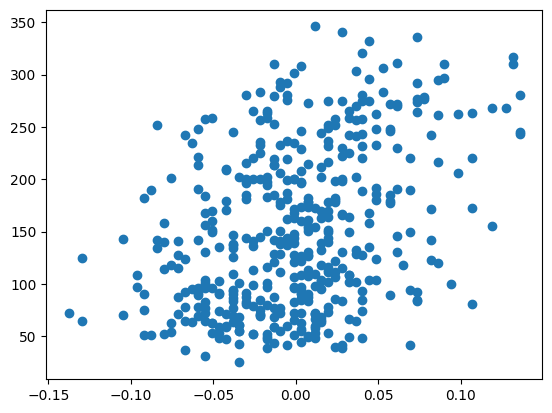

In [ ]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
plt.scatter(diabetes.data[:, -1], diabetes.target)

In [ ]:
import pandas as pd

diabetes_df = pd.DataFrame(data = diabetes.data,
                           columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(diabetes.data[:, -1], dtype=torch.float32)
y = torch.tensor(diabetes.target, dtype=torch.float32)

In [ ]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [ ]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-2.8019])
dL/db = 
 tensor([-304.2670])


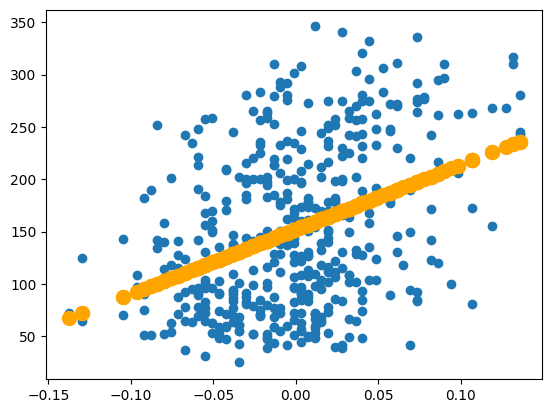

loss =  5062.3853


In [ ]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b

    # Вычисляем функцию ошибок
    loss = torch.mean((y_pred - y)**2)

    # Вычисляем градиенты
    loss.backward()


    # Делаем шаг градиентного спуска по матрице весов
    w.data -= 0.5*w.grad.data
    b.data -= 0.5*b.grad.data

    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()



    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

Посмотрим градиенты на примере двухслойной сети

In [ ]:
dtype = torch.float
device = torch.device("cuda:0")
# device = torch.device("cuda:0") # Раскомментируйте это, чтобы запустить на GPU

# N - размер батча; D_in - входной размер;
# H - размер скрытого слоя; D_out - размер вывода.
N, D_in, H, D_out = 64, 3, 3, 10
N, D_in, H, D_out = 64, 3, 3, 10

# Создание случайных тензоров для хранения входных и выходных данных.
# Настройка requires_grad = False указывает, что нам не нужно вычислять градиенты
# по отношению к этим тензорам во время обратного прохода.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Создаем тензоры случайных весов.
# Настройка requires_grad = True указывает, что мы хотим вычислять градиенты с
# уважение к этим тензорам во время обратного прохода.

# Create random Tensors for weights.
# Установка requires_grad = True указывает, что мы хотим вычислить градиенты
# относительно этих тензоров во время обратного прохода.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

In [ ]:
y_pred = (x @ w1).clamp(min=0).matmul(w2)
loss = (y_pred - y).pow(2).sum()

# вычисляем градиенты
loss.backward()

In [ ]:
print((y_pred - y).pow(2).sum())

tensor(3329.2061, device='cuda:0', grad_fn=<SumBackward0>)


In [ ]:
w1.grad, w2.grad

(tensor([[ -976.6740,   114.5829,   261.4722],
         [  129.0030,   -87.4485,  -693.2852],
         [ -879.0057,   497.5070, -1112.4919]], device='cuda:0'),
 tensor([[ 1.7104e+02,  1.7207e+02,  4.3050e+02, -7.3536e+02, -4.3053e+02,
          -9.2488e+01,  4.2623e+02,  6.2211e+01,  1.9490e+02, -1.3691e+02],
         [-4.8422e+01,  7.1862e+00, -3.5437e+01, -4.5189e+01,  6.5898e+00,
           5.6796e+01, -2.2583e-03, -5.6755e+01, -1.9024e+02, -3.6591e+01],
         [-6.1110e+00,  6.5230e+01,  1.5203e+02, -2.3185e+01, -1.7118e+02,
          -6.7278e+01,  2.4703e+02,  8.1335e+01, -3.9187e+01, -2.2187e+00]],
        device='cuda:0'))

In [ ]:
loss.grad # нет доступа к нелистовым градиентам в дереве AD

<ipython-input-81-391fe38783cc>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  loss.grad # нет доступа к нелистовым градиентам в дереве AD


In [ ]:
# заставляем переменную запоминать градиенты фнукции потерь
y_pred = (x @ w1).clamp(min=0).matmul(w2)
# с помощью этой функции
y_pred.retain_grad()

loss = (y_pred - y).pow(2).sum()
loss.retain_grad()

loss.backward()

In [ ]:
loss.grad

tensor(1., device='cuda:0')

In [ ]:
x.grad # не требует градиента

In [ ]:
y.grad # не требует градиента

**Замечание:** Градиенты помещаются в поле `.grad` тензоров, на которых они вычисляются.

In [ ]:
w1

tensor([[-1.8179,  0.1903,  0.3773],
        [ 1.6797,  0.7378, -0.2871],
        [-1.6139,  1.3254, -0.9538]], device='cuda:0', requires_grad=True)

In [ ]:
with torch.no_grad():
    pass

## Дополнительные материалы

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*